In [ ]:
from spectral_cube import SpectralCube
from astropy.io import fits
import astropy.units as u
import matplotlib.pyplot as plt


cube = SpectralCube.read('/orange/adamginsburg/w51/TaehwaYoo/ALMA_IMF/RestructuredImagingResults/W51-IRS2/B6/fullcubes_12m/W51-IRS2_B6_spw5_12M_spw5.JvM.image.pbcor.statcont.contsub.fits')

print(cube.spectral_axis)          # e.g., velocity or frequency axis
print(cube.spectral_axis.unit)     # usually 'm/s' or 'km/s'

rest_freq = 230.538e9*u.Hz  # Hz, rest frequency for CO(2-1)
cube = cube.with_spectral_unit('km/s', velocity_convention='radio', rest_value=rest_freq)

subcube = cube.spectral_slab( * u.km/u.s, 80 * u.km/u.s)

moment0 = subcube.moment(order=0)

moment0.write('fitsfiles/moment0.fits', overwrite=True)



/home/t.yoo/anaconda3/envs/py311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2.30254695e+11 2.30255672e+11 2.30256648e+11 2.30257625e+11
 2.30258601e+11 2.30259578e+11 2.30260554e+11 2.30261531e+11
 2.30262507e+11 2.30263484e+11 2.30264460e+11 2.30265437e+11
 2.30266413e+11 2.30267390e+11 2.30268366e+11 2.30269343e+11
 2.30270319e+11 2.30271296e+11 2.30272272e+11 2.30273248e+11
 2.30274225e+11 2.30275201e+11 2.30276178e+11 2.30277154e+11
 2.30278131e+11 2.30279107e+11 2.30280084e+11 2.30281060e+11
 2.30282037e+11 2.30283013e+11 2.30283990e+11 2.30284966e+11
 2.30285943e+11 2.30286919e+11 2.30287896e+11 2.30288872e+11
 2.30289849e+11 2.30290825e+11 2.30291802e+11 2.30292778e+11
 2.30293755e+11 2.30294731e+11 2.30295707e+11 2.30296684e+11
 2.30297660e+11 2.30298637e+11 2.30299613e+11 2.30300590e+11
 2.30301566e+11 2.30302543e+11 2.30303519e+11 2.30304496e+11
 2.30305472e+11 2.30306449e+11 2.30307425e+11 2.30308402e+11
 2.30309378e+11 2.30310355e+11 2.30311331e+11 2.30312308e+11
 2.30313284e+11 2.30314261e+11 2.30315237e+11 2.30316214e+11
 2.30317190e+11 2.303181

(1028, 987)


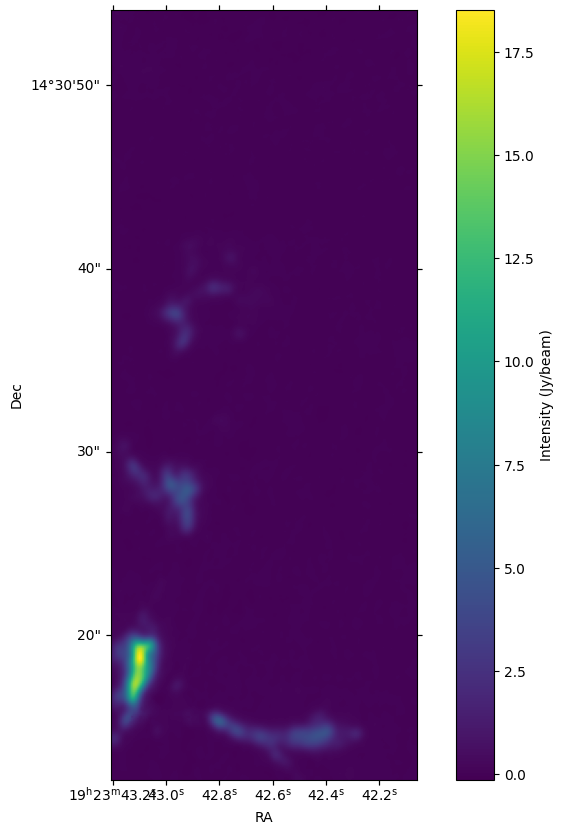

In [2]:
from regions import Regions
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
outflow_overview_regs = Regions.read('regions/outflow_overview.reg')
outflow_overview_reg = outflow_overview_regs[0]

moment0_map = fits.open('fitsfiles/moment0_80-100kms.fits')
moment0_map = moment0_map[0].data
moment0_header = fits.getheader('fitsfiles/moment0_80-100kms.fits')
wcs_moment0 = WCS(moment0_header)
moment0_map_cutout = Cutout2D(moment0_map, outflow_overview_reg.center, (outflow_overview_reg.height, outflow_overview_reg.width), wcs=wcs_moment0)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=wcs_moment0)
ax.imshow(moment0_map_cutout.data, origin='lower', cmap='viridis')
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
plt.colorbar(ax.images[0], ax=ax, label='Intensity (Jy/beam)')
print(moment0.shape)

In [3]:
from matplotlib import colors
import astropy.units as u
import matplotlib as mpl

from astropy.io import fits
import numpy as np
from astropy.visualization import simple_norm
import pylab as plt
from astropy import wcs
import os
from reproject import reproject_interp
import PIL
#import pyavm
import shutil
from matplotlib.colors import LinearSegmentedColormap
plt.rcParams['axes.labelsize']=60
plt.rcParams['xtick.labelsize']=50
plt.rcParams['ytick.labelsize']=50
plt.rcParams['axes.titlesize']=60
mpl.rcParams['axes.linewidth'] = 10
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 4
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 2

image_filenames ={
    "f140m": "/orange/adamginsburg/jwst/w51/F140M/pipeline/jw06151-o001_t001_nircam_clear-f140m-merged_i2d.fits",
    "f150w": "/orange/adamginsburg/jwst/w51/F150W/pipeline/jw06151-o001_t001_nircam_clear-f150w-merged_i2d.fits",
    "f162m": "/orange/adamginsburg/jwst/w51/F162M/pipeline/jw06151-o001_t001_nircam_clear-f162m-merged_i2d.fits",
    "f182m": "/orange/adamginsburg/jwst/w51/F182M/pipeline/jw06151-o001_t001_nircam_clear-f182m-merged_i2d.fits",
    "f187n": "/orange/adamginsburg/jwst/w51/F187N/pipeline/jw06151-o001_t001_nircam_clear-f187n-merged_i2d.fits",
    "f210m": "/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151-o001_t001_nircam_clear-f210m-merged_i2d.fits",
    "f335m": "/orange/adamginsburg/jwst/w51/F300M/pipeline/jw06151-o001_t001_nircam_clear-f335m-merged_i2d.fits",
    "f360m": "/orange/adamginsburg/jwst/w51/F360M/pipeline/jw06151-o001_t001_nircam_clear-f360m-merged_i2d.fits",
    "f405n": "/orange/adamginsburg/jwst/w51/F405N/pipeline/jw06151-o001_t001_nircam_clear-f405n-merged_i2d.fits",
    "f410m": "/orange/adamginsburg/jwst/w51/F410M/pipeline/jw06151-o001_t001_nircam_clear-f410m-merged_i2d.fits", # weird, the filename is different from what is downloaded with the STScI pipeline...
    "f480m": "/orange/adamginsburg/jwst/w51/F480M/pipeline/jw06151-o001_t001_nircam_clear-f480m-merged_i2d.fits",
    "f560w": "/orange/adamginsburg/jwst/w51/F560W/pipeline/jw06151-o002_t001_miri_f560w_i2d.fits",
    "f770w": "/orange/adamginsburg/jwst/w51/F770W/pipeline/jw06151-o002_t001_miri_f770w_i2d.fits",
    "f1000w": "/orange/adamginsburg/jwst/w51/F1000W/pipeline/jw06151-o002_t001_miri_f1000w_i2d.fits",
    "f1280w": "/orange/adamginsburg/jwst/w51/F1280W/pipeline/jw06151-o002_t001_miri_f1280w_i2d.fits",
    "f1500w": "/orange/adamginsburg/jwst/w51/F1500W/pipeline/jw06151-o002_t001_miri_f1500w_i2d.fits",
    "f2100w": "/orange/adamginsburg/jwst/w51/F2100W/pipeline/jw06151-o002_t001_miri_f2100w_i2d.fits",
    
}

image_sub_filenames = {
    "f405n-f410m": "/orange/adamginsburg/jwst/w51/F405_minus_F410cont_pipeline_v0.1.fits",
    "f410m-f405n": "/orange/adamginsburg/jwst/w51/F410_minus_F405_fractional_bandwidth_pipeline_v0.1.fits",
    "f187n-f182m": "/orange/adamginsburg/jwst/w51/F187_minus_F182cont_pipeline_v0.1.fits",

}

from astropy.wcs import WCS

reproj_dir = '/orange/adamginsburg/jwst/w51/data_reprojected_480/'
repr480_image_filenames = {x: y.replace("i2d", "i2d_reprj_f480") for x,y in image_filenames.items()}
repr480_image_filenames = {x: (reproj_dir+os.path.basename(y)) for x,y in repr480_image_filenames.items()}

img1 = fits.getdata(repr480_image_filenames['f187n'])
img2 = fits.getdata(repr480_image_filenames['f360m'])
img3 = fits.getdata(repr480_image_filenames['f405n'])
ref_fits = fits.open(image_filenames['f480m'])
tgt_header = fits.getheader(image_filenames['f480m'], ext=('SCI', 1))

wcs_header = WCS(tgt_header)

def make_rgb_image(repr480_image_filenames, filt1, filt2, filt3, cutout_region=None,
    alpha_red=0.7, alpha_green=0.78, alpha_blue=0.74, 
    figsize=(48,20),
    vmin_img1=-2.12, vmax_img1=3987, vmin_img2=-2.12, vmax_img2=2409, vmin_img3=-2.12, vmax_img3=798, 
    color_scheme='rgb'):
    """
    Create an RGB image from three filters.
    """
    img1 = fits.getdata(repr480_image_filenames[filt1])
    img2 = fits.getdata(repr480_image_filenames[filt2])
    img3 = fits.getdata(repr480_image_filenames[filt3])

    ref_fits = fits.open(repr480_image_filenames['f480m'])
    tgt_header = fits.getheader(repr480_image_filenames['f480m'], ext=('SCI', 1))

    wcs_header = WCS(tgt_header)
    if color_scheme == 'rgb':
        cmap1 = LinearSegmentedColormap.from_list('red', [(0, 0, 0), (1, 0, 0)])
        cmap2 = LinearSegmentedColormap.from_list('green', [(0, 0, 0), (0, 1, 0)])
        cmap3 = LinearSegmentedColormap.from_list('blue', [(0, 0, 0), (0, 0, 1)])
    elif color_scheme == 'cmyk':
        cmap1 = LinearSegmentedColormap.from_list('magenta', [(0, 0, 0), (1, 0, 1)])
        cmap2 = LinearSegmentedColormap.from_list('yellow', [(0, 0, 0), (1, 1, 0)])
        cmap3 = LinearSegmentedColormap.from_list('cyan', [(0, 0, 0), (0, 1, 1)])

    if cutout_region is not None:
        from regions import Regions
        from astropy.nddata import Cutout2D
      
        img1 = Cutout2D(img1, cutout_region.center, (cutout_region.width, cutout_region.height), wcs=wcs_header).data
        img2 = Cutout2D(img2, cutout_region.center, (cutout_region.width, cutout_region.height), wcs=wcs_header).data
        img3 = Cutout2D(img3, cutout_region.center, (cutout_region.width, cutout_region.height), wcs=wcs_header).data    
    

    norm1 = simple_norm(img1, stretch='log', vmin=vmin_img1, vmax=vmax_img1)
    norm2 = simple_norm(img2, stretch='log', vmin=vmin_img2, vmax=vmax_img2)
    norm3 = simple_norm(img3, stretch='log', vmin=vmin_img3, vmax=vmax_img3)

    color1_rgb = cmap1(norm1(img1))[...,:3] * alpha_red
    color2_rgb  = cmap2(norm2(img2))[...,:3]  * alpha_green
    color3_rgb    = cmap3(norm3(img3))[...,:3]    * alpha_blue

    composite = color1_rgb + color2_rgb + color3_rgb
    composite = np.clip(composite, 0, 1)

    fig = plt.figure(figsize=figsize )
    ax = fig.add_subplot(111, projection=wcs_header)

    ax.imshow(composite, origin='lower', )
    ax.set_xlabel('RA')
    ax.set_ylabel('Dec')


    ra = lon = ax.coords['ra']
    dec = lat = ax.coords['dec']
    ra.set_major_formatter('hh:mm:ss.ss')
    dec.set_major_formatter('dd:mm:ss.ss')
    ra.set_axislabel('Right Ascension')
    ra.set_ticklabel(rotation=25, pad=30)
    dec.set_axislabel('Declination')
    
    ra.set_ticks_position('l')
    ra.set_ticklabel_position('l')
    ra.set_axislabel_position('l')
    dec.set_ticks_position('b')
    dec.set_ticklabel_position('b')
    dec.set_axislabel_position('b')

    return fig, ax, composite




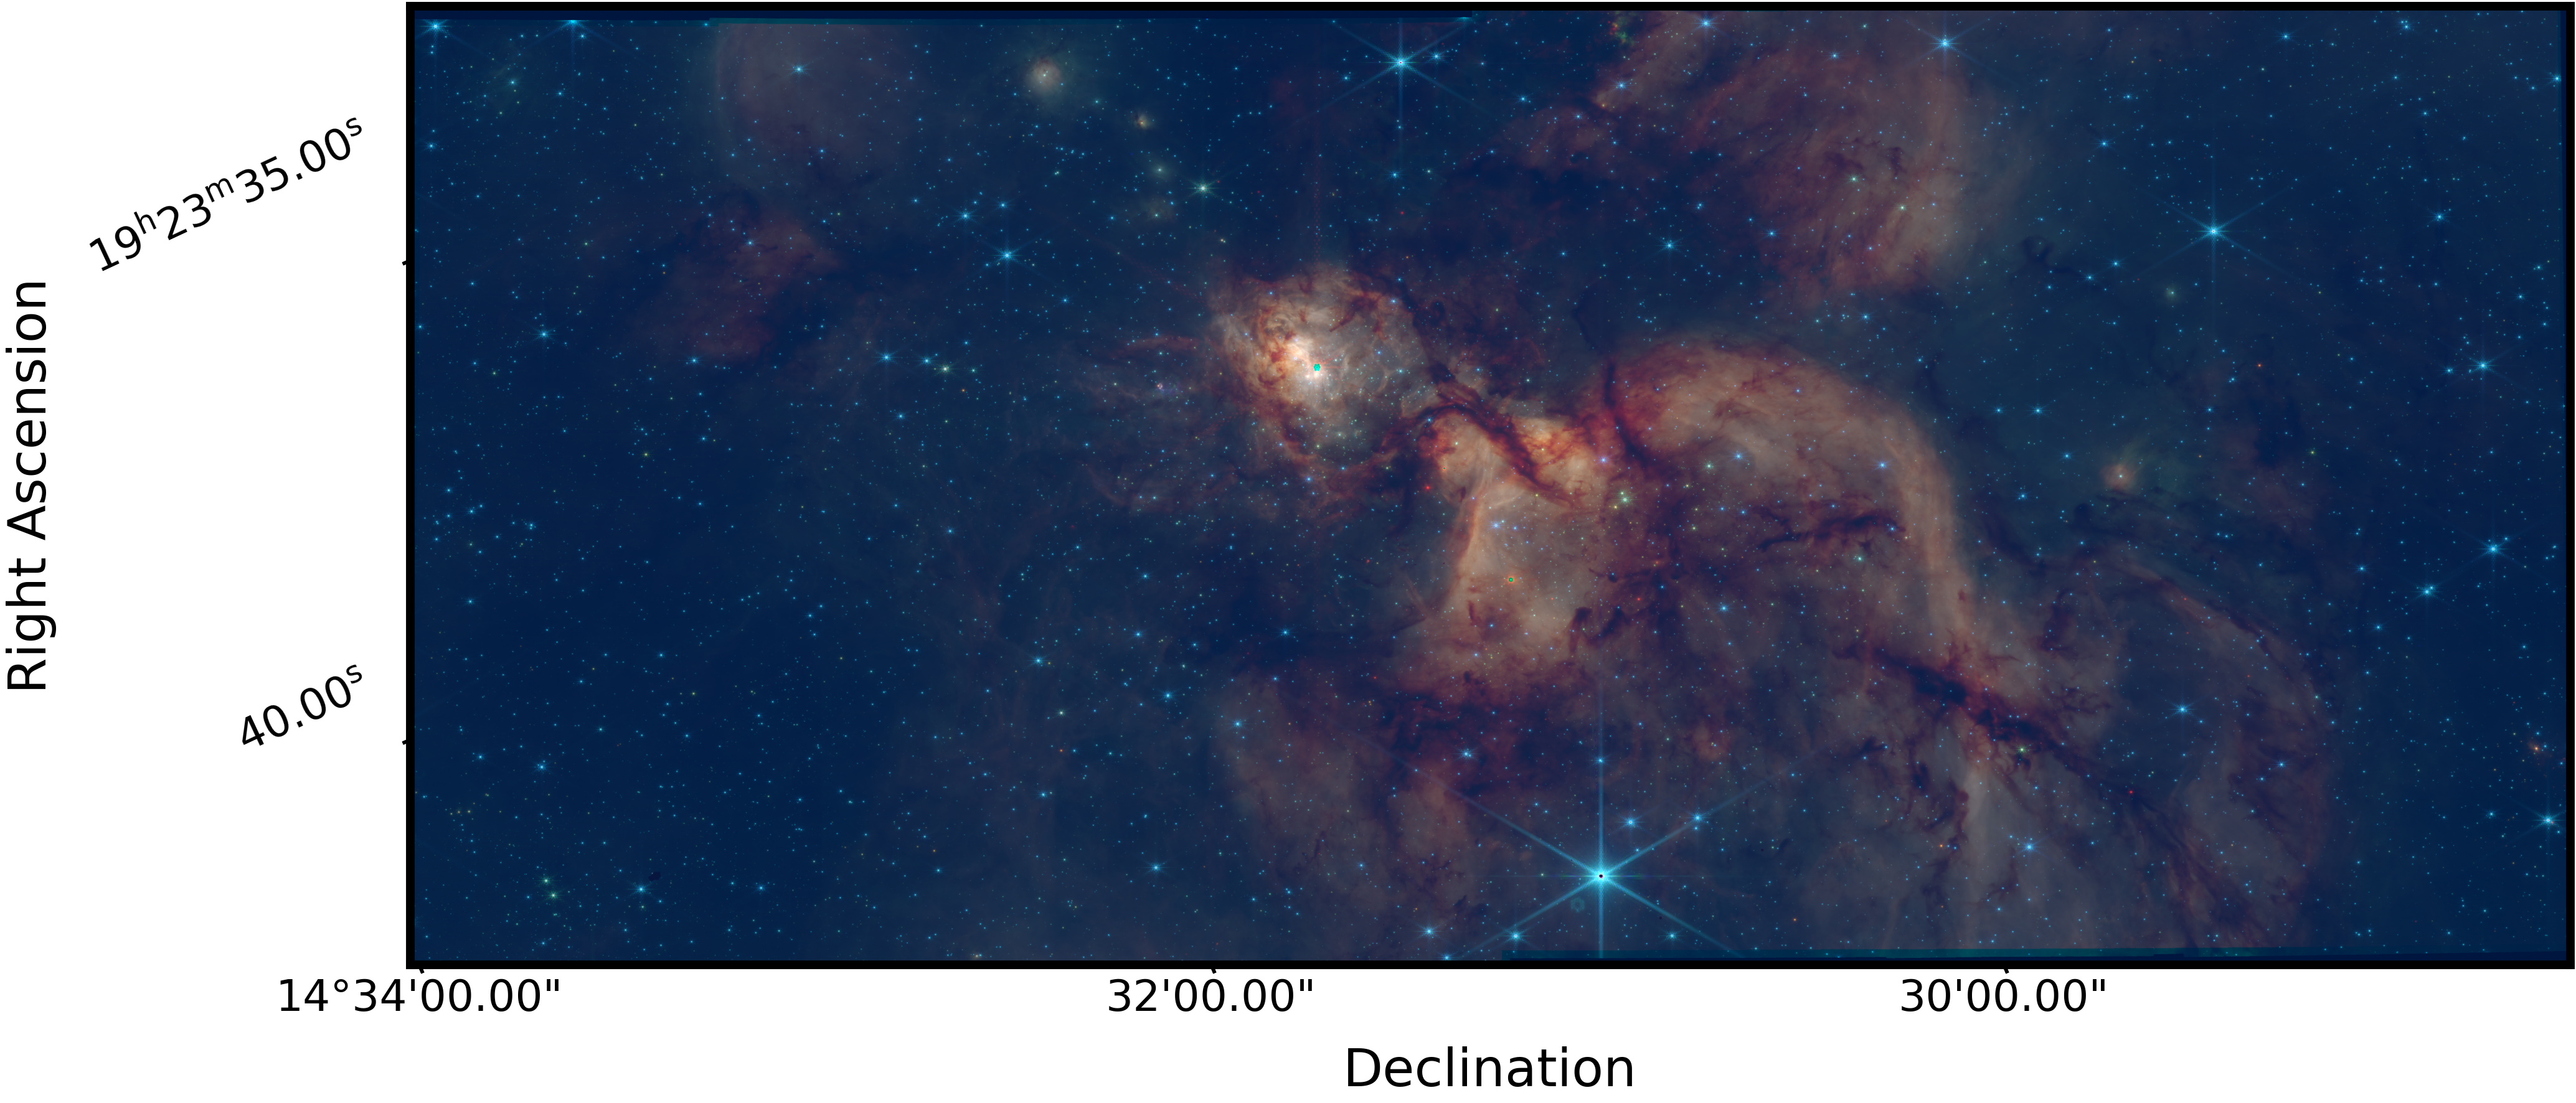

In [4]:
fig, ax, rgbimage = make_rgb_image(repr480_image_filenames, 'f405n', 'f210m', 'f162m', alpha_red=1, alpha_green=1, alpha_blue=1, figsize=(48,20),
vmin_img1=0.04267011225633506, vmax_img1=28679, vmin_img2=-1.22, vmax_img2=1456, vmin_img3=-2.12, vmax_img3=482,)
plt.savefig(f'rgbs/overview_rgb_f405n-f210m-f162m.png', dpi=100, bbox_inches='tight')
plt.show()




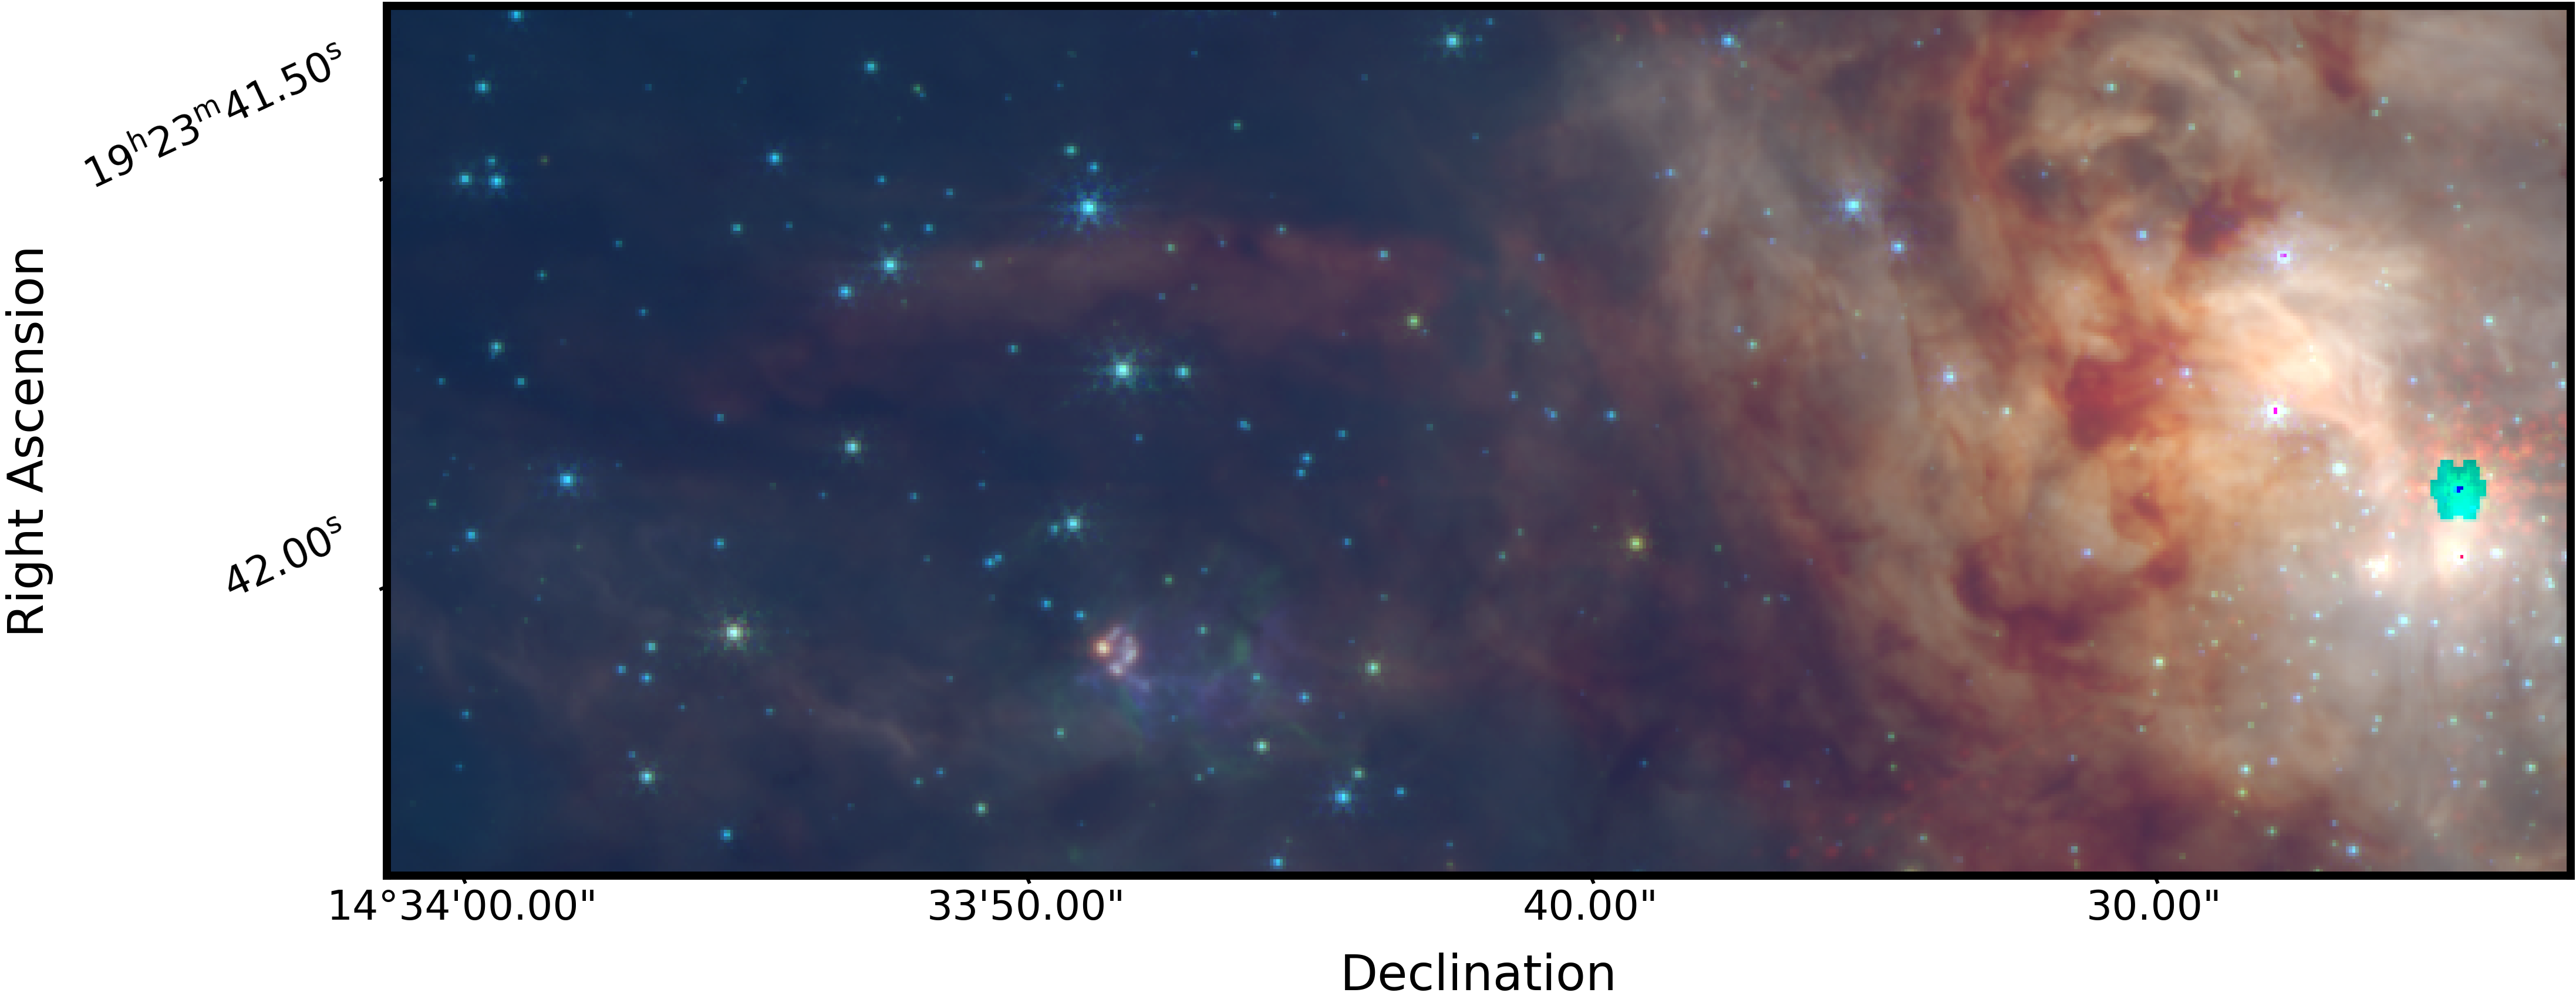

In [5]:
from regions import Regions
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/home/t.yoo/Paths')
import Paths.Paths as paths

Path = paths.filepaths()
# Load region files
overview_reg = Regions.read('regions/outflow_overview.reg')[0]
zoomin_reg = Regions.read('regions/outflow_zoomin.reg')[0]

# Load images and WCS
rgb_img = plt.imread('rgbs/overview_rgb_f405n-f210m-f162m.png')
moment0_hdu = fits.open('fitsfiles/moment0_80-100kms.fits')[0]
moment0_data = moment0_hdu.data
moment0_wcs = WCS(moment0_hdu.header)

rgb_wcs = wcs_header

fig, ax, rgbimage_overview = make_rgb_image(repr480_image_filenames, 'f405n', 'f210m', 'f162m', alpha_red=1, alpha_green=1, alpha_blue=1, figsize=(48,20),
vmin_img1=0.04267011225633506, vmax_img1=28679, vmin_img2=-1.22, vmax_img2=1456, vmin_img3=-2.12, vmax_img3=482, cutout_region=overview_reg)
plt.savefig(f'rgbs/overview_rgb_reg_f405n-f210m-f162m.png', dpi=100, bbox_inches='tight')
plt.show()




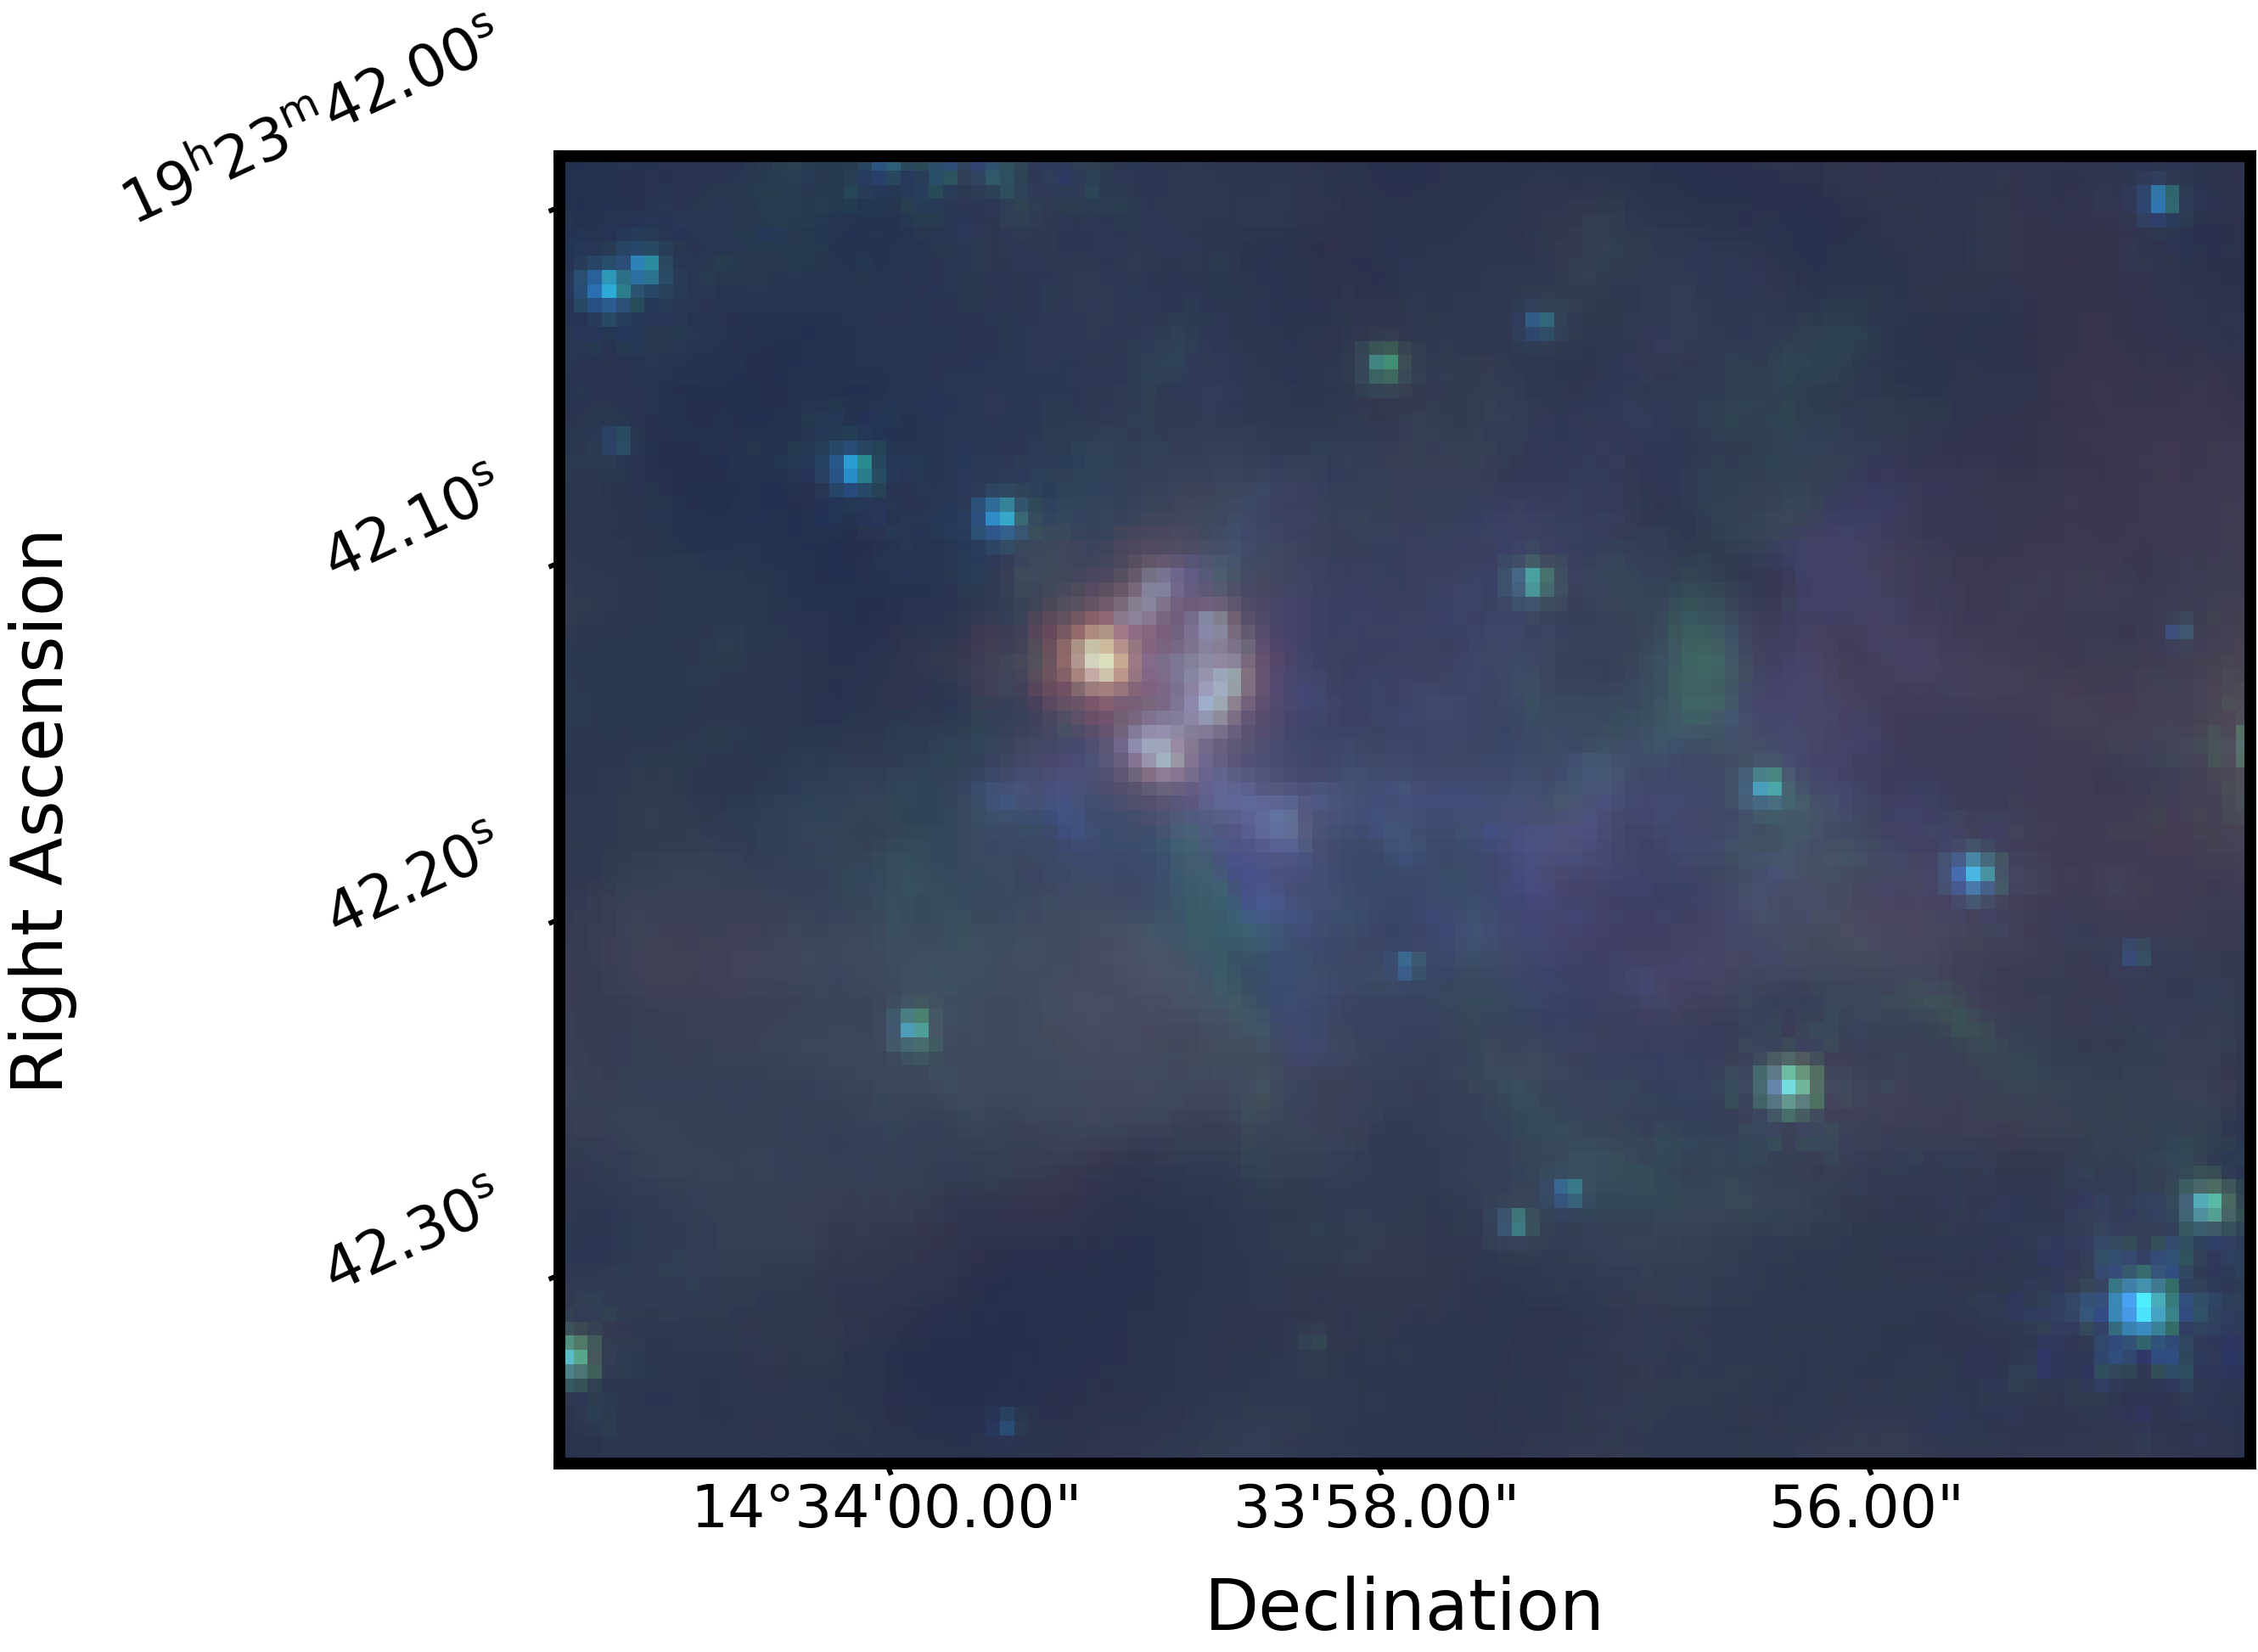

In [6]:
fig, ax, rgbimage_zoomin = make_rgb_image(repr480_image_filenames, 'f405n', 'f210m', 'f162m', alpha_red=1, alpha_green=1, alpha_blue=1, figsize=(48,20),
vmin_img1=0.04267011225633506, vmax_img1=28679, vmin_img2=-1.22, vmax_img2=1456, vmin_img3=-2.12, vmax_img3=482, cutout_region=zoomin_reg)
plt.savefig(f'rgbs/overview_rgb_zoominreg_f405n-f210m-f162m.png', dpi=100, bbox_inches='tight')
plt.show()



WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN' 'DEC--SIN' 
CRVAL : np.float64(290.91587500004) np.float64(14.517466891179) 
CRPIX : np.float64(47.0) np.float64(12.0) 
PC1_1 PC1_2  : np.float64(1.0) np.float64(0.0) 
PC2_1 PC2_2  : np.float64(0.0) np.float64(1.0) 
CDELT : np.float64(-2.7777777777777e-05) np.float64(2.7777777777778e-05) 
NAXIS : 167  420
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : np.float64(290.92551500560137) np.float64(14.513234201139301) 
CRPIX : np.float64(2815.1233952231114) np.float64(1247.9773225597498) 
PC1_1 PC1_2  : np.float64(0.3893899895797071) np.float64(-0.9210729808300293) 
PC2_1 PC2_2  : np.float64(-0.9210729808300293) np.float64(-0.3893899895797071) 
CDELT : np.float64(1.74776092841569e-05) np.float64(1.74776092841569e-05) 
NAXIS : 5645  2506


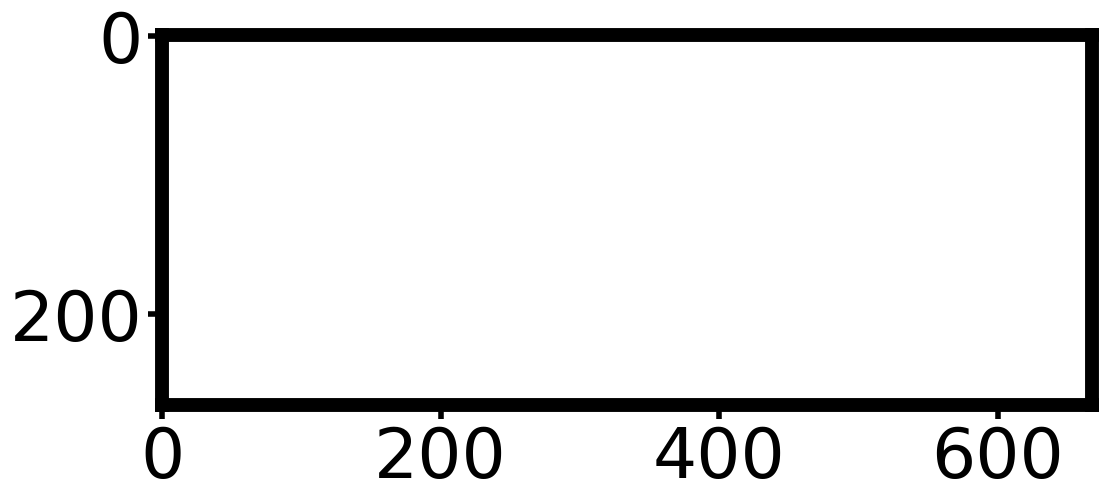

In [15]:
from PIL import Image
alma_b3_fits = fits.open(Path.w51n_b3_tt0)
alma_b3_image = alma_b3_fits[0].data
if len(alma_b3_image.shape)!=2:
    alma_b3_image = alma_b3_image[0, 0, :, :]  # Adjust if the data is 3D (e.g., spectral cube)
alma_b3_wcs = WCS(alma_b3_fits[0].header, naxis=2)



"""
def get_cutout_fits_png_from_region(regiondata, pngimage, fitsimage, fitswcs):
    
    
    fits_cutout = Cutout2D(fitsimage, regiondata.center, (regiondata.height, regiondata.width), wcs=fitswcs)

    ymin, ymax = fits_cutout.ymin_original, fits_cutout.ymax_original
    xmin, xmax = fits_cutout.xmin_original, fits_cutout.xmax_original

    fits_shape = fitsimage.shape  # (height, width)
    png_shape = pngimage.shape[:2] 

    scale_y = png_shape[0] / fits_shape[0]
    scale_x = png_shape[1] / fits_shape[1]

    # Scale indices for PNG
    ymin_png = int(ymin * scale_y)
    ymax_png = int(ymax * scale_y)
    xmin_png = int(xmin * scale_x)
    xmax_png = int(xmax * scale_x)

    png_img_cutout = pngimage[ymin_png:ymax_png, xmin_png:xmax_png]


    return png_img_cutout, fits_cutout.data

overview_png, moment0_map_cutout.data = get_cutout_fits_png_from_region(overview_reg, rgb_img, moment0_data, moment0_wcs)
zoomin_png, zoomin_fits = get_cutout_fits_png_from_region(zoomin_reg, rgb_img, moment0_data, moment0_wcs)
"""

overview_alma = Cutout2D(alma_b3_image, overview_reg.center, (overview_reg.height, overview_reg.width), wcs=alma_b3_wcs)
zoomin_alma = Cutout2D(alma_b3_image, zoomin_reg.center, (zoomin_reg.height, zoomin_reg.width), wcs=alma_b3_wcs)
print(moment0_map_cutout.wcs)
print(rgb_wcs)
moment0_reproj_overview, _ = reproject_interp((moment0_map_cutout.data, moment0_map_cutout.wcs), rgb_wcs, shape_out=rgbimage_overview.shape[:2])
alma_reproj_overview, _ = reproject_interp((overview_alma.data, overview_alma.wcs), rgb_wcs, shape_out=rgbimage_overview.shape[:2])

moment0_reproj_zoomin,_ = reproject_interp((moment0_map_cutout.data, moment0_map_cutout.wcs), rgb_wcs, shape_out=rgbimage_zoomin.shape[:2])
alma_reproj_zoomin, _ = reproject_interp((zoomin_alma.data, zoomin_alma.wcs), rgb_wcs, shape_out=rgbimage_zoomin.shape[:2])

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(111)
ax1.imshow(moment0_reproj_overview)

In [ ]:

overview_shape = rgbimage_overview.shape  # (height, width)
zoomin_shape = rgbimage_zoomin.shape
print(overview_shape, zoomin_shape)
# Aspect ratios
print(overview_shape)
print(zoomin_shape)
overview_ratio = overview_shape[1] / overview_shape[0]
zoomin_ratio = zoomin_shape[1] / zoomin_shape[0]

# Set a base height (e.g., 10 inches for each row)
base_height = 10
top_width = overview_ratio * base_height
bottom_width = 2 * zoomin_ratio * base_height  # two panels side by side

fig_width = max(top_width, bottom_width)
fig_height = 2 * base_height  # one row for top, one for bottom

fig = plt.figure(figsize=(fig_width, fig_height))
gs = gridspec.GridSpec(2, 2, height_ratios=[overview_shape[0], zoomin_shape[0]], width_ratios=[zoomin_shape[1], zoomin_shape[1]])
gs = gridspec.GridSpec(2, 2)

# Top panel (spans both columns)
ax_top = fig.add_subplot(gs[0, :])
# Bottom left
ax_bl = fig.add_subplot(gs[1, 0])
# Bottom right
ax_br = fig.add_subplot(gs[1, 1])

ax_top.imshow(rgbimage_overview, origin='lower')
levels = np.linspace(np.nanmin(moment0_reproj_overview.data), np.nanmax(moment0_reproj_overview.data), 30)  # adjust number of levels as needed
ax_top.contour(moment0_reproj_overview.data , levels=levels, colors='white', linewidths=1, )
ax_top.set_xticks([])
ax_top.set_yticks([])
ax_bl.imshow(rgbimage_zoomin, origin='lower')
#ax_bl.contour(zoomin_fits, levels=levels, colors='white', linewidths=2, )
ax_bl.set_xticks([])
ax_bl.set_yticks([])

ax_br.imshow(alma_reproj_zoomin, origin='lower')
ax_br.set_xticks([])
ax_br.set_yticks([])